<a href="https://colab.research.google.com/github/OliverPrism/Prism-Stock-Forecast-v2.0/blob/main/Item_Main_Category_investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-cloud-bigquery

In [1]:
from google.colab import auth
auth.authenticate_user()


In [3]:
from google.cloud import bigquery

client = bigquery.Client(project='prism-insights')

In [125]:
query = """
SELECT *
FROM `prism-insights.prism_insights_dev.stg_transactions_and_items` as t
LEFT JOIN `prism-insights.prism_insights_dev.stg_product_attributes` as a
ON t.item_id = a.item_id
ORDER BY transaction_date
"""
df = client.query(query).to_dataframe()

In [126]:
df.head()

,transaction_date,transaction_id,item_id,item_price,item_quantity,updated_at,item_id_1,item_brand,item_name,item_main_category,item_sub_category,item_gender
0,2020-01-01,1005433475,568811,2.0,1,2023-11-30,568811,Prism,belt,Accessories,Belts,Men
1,2020-01-01,1005433475,568815,2.0,1,2023-11-30,568815,Prism,belt,Accessories,Belts,Men
2,2020-01-01,5429400,813253,2.0,1,2023-11-30,813253,Prism,socks,Homewear & Underwear,Socks,Men
3,2020-01-01,5429611,813275,2.0,1,2023-11-30,813275,Prism,socks,Homewear & Underwear,Socks,Men
4,2020-01-01,5434294,813275,2.0,1,2023-11-30,813275,Prism,socks,Homewear & Underwear,Socks,Men


In [127]:
import pandas as pd
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

In [128]:
df.set_index("transaction_date", inplace = True)

In [129]:
df.head()

,transaction_id,item_id,item_price,item_quantity,updated_at,item_id_1,item_brand,item_name,item_main_category,item_sub_category,item_gender
transaction_date,,,,,,,,,,,
2020-01-01,1005433475,568811,2.0,1,2023-11-30,568811,Prism,belt,Accessories,Belts,Men
2020-01-01,1005433475,568815,2.0,1,2023-11-30,568815,Prism,belt,Accessories,Belts,Men
2020-01-01,5429400,813253,2.0,1,2023-11-30,813253,Prism,socks,Homewear & Underwear,Socks,Men
2020-01-01,5429611,813275,2.0,1,2023-11-30,813275,Prism,socks,Homewear & Underwear,Socks,Men
2020-01-01,5434294,813275,2.0,1,2023-11-30,813275,Prism,socks,Homewear & Underwear,Socks,Men


In [29]:
df_weekly = df.resample("W",origin='end_day')["item_quantity"].sum()

In [10]:
df["item_quantity"].value_counts()

1      763569
2       16610
3        1748
4         753
5         346
6         248
10        105
7          95
15         92
8          77
12         49
9          38
14         19
13         18
11         12
20         10
16          5
30          4
44          4
46          3
17          2
18          2
21          2
40          2
45          2
47          2
33          1
43          1
37          1
39          1
58          1
38          1
26          1
57          1
19          1
50          1
25          1
22          1
29          1
100         1
42          1
Name: item_quantity, dtype: Int64

In [11]:
df_weekly.head()


transaction_date
2020-01-05    2455
2020-01-12    3432
2020-01-19    3080
2020-01-26    2777
2020-02-02    2331
Freq: W-SUN, Name: item_quantity, dtype: Int64

In [12]:
print(df_weekly.tail())
print(df.index.max())

transaction_date
2022-07-03    11638
2022-07-10     8067
2022-07-17     8493
2022-07-24    10516
2022-07-31     1661
Freq: W-SUN, Name: item_quantity, dtype: Int64
2022-07-25 00:00:00


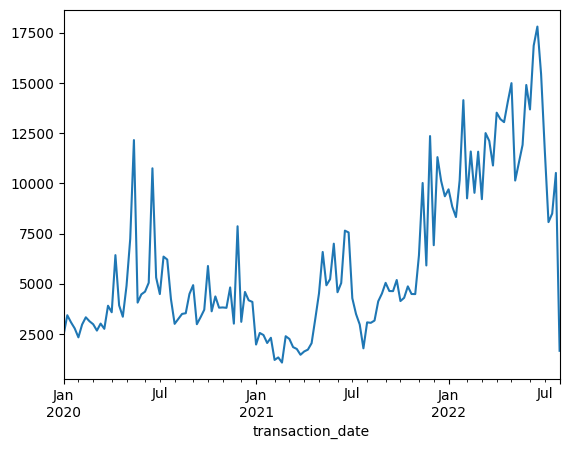

In [13]:
import matplotlib.pyplot as plt
df_weekly.plot()
plt.show()

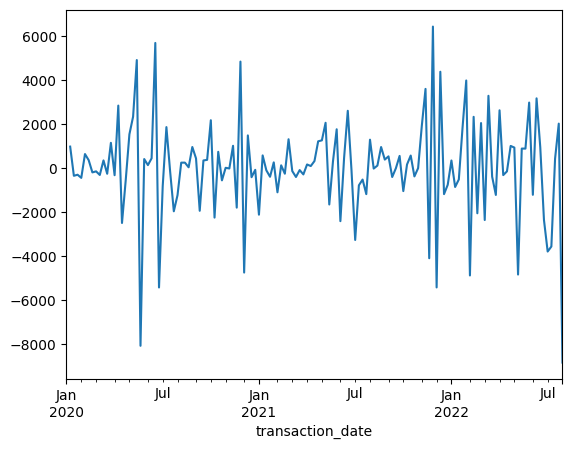

In [14]:
import matplotlib.pyplot as plt
df_weekly.diff().plot()
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 783832 entries, 2020-01-01 to 2022-07-25
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  783832 non-null  object 
 1   item_id         783832 non-null  object 
 2   item_price      783832 non-null  float64
 3   item_quantity   783832 non-null  Int64  
 4   updated_at      783832 non-null  dbdate 
dtypes: Int64(1), dbdate(1), float64(1), object(2)
memory usage: 36.6+ MB


In [16]:
df.describe()

,item_price,item_quantity
count,783832.000000,783832.0
mean,18.997646,1.040075
std,21.200620,0.443928
min,0.500000,1.0
25%,6.000000,1.0
50%,12.500000,1.0
75%,25.000000,1.0
max,1250.000000,100.0


In [17]:
df.index.name = 'MyIdx'
df = df.sort_values(by = ['MyIdx', 'transaction_id'], ascending = [True, True])

In [18]:
df.head()

,transaction_id,item_id,item_price,item_quantity,updated_at
MyIdx,,,,,
2020-01-01,1005423328,879740,10.0,1,2023-11-30
2020-01-01,1005424921,875315,35.0,1,2023-11-30
2020-01-01,1005427626,833868,17.5,1,2023-11-30
2020-01-01,1005428719,790823,77.5,1,2023-11-30
2020-01-01,1005428807,877724,20.0,1,2023-11-30


In [19]:
df[df[["transaction_id","item_id"]].duplicated(keep = False)]

,transaction_id,item_id,item_price,item_quantity,updated_at
MyIdx,,,,,


In [94]:
var = "item_main_category"

In [95]:
df_weekly_sub = df.groupby(var)["item_quantity"].resample("W").sum()

In [96]:
df_weekly_sub.columns = [var, "item_quantity"]

In [97]:
df_weekly_sub.head()

item_main_category  transaction_date
Accessories         2020-01-05          248
                    2020-01-12          276
                    2020-01-19          293
                    2020-01-26          282
                    2020-02-02          248
Name: item_quantity, dtype: Int64

In [98]:
df_weekly_sub = df_weekly_sub.reset_index(level = var)

In [115]:
df_weekly_sub.head()

,item_main_category,item_quantity
transaction_date,,
2020-01-05,Accessories,248
2020-01-12,Accessories,276
2020-01-19,Accessories,293
2020-01-26,Accessories,282
2020-02-02,Accessories,248


In [137]:
df_weekly_unmelt = df_weekly_sub.pivot_table(values = "item_quantity",  index = "transaction_date", columns = var, aggfunc="first")


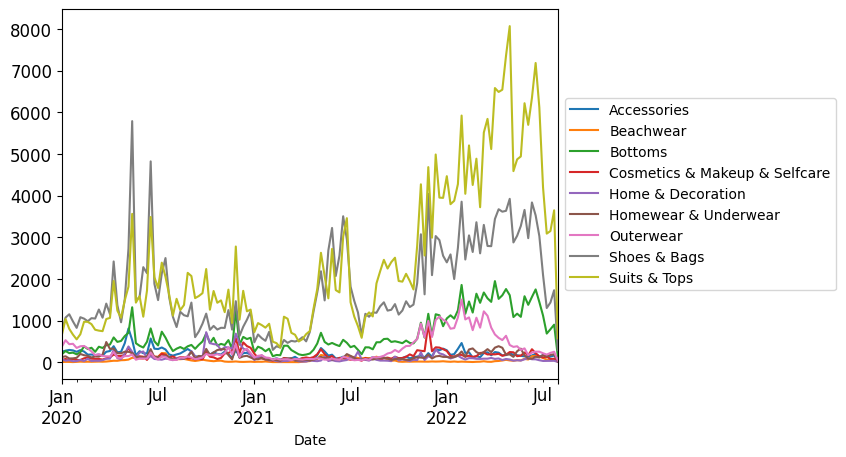

In [107]:
# Plot an area chart
ax = df_weekly_unmelt.plot(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()


In [103]:
df_tots = df_weekly_unmelt.sum()

In [104]:
import numpy as np
np.quantile(df_tots, 0.9)

255071.80000000002

In [106]:
main_lines = df_tots[df_tots>np.quantile(df_tots, 0.6)].index
print(main_lines)

Index(['Bottoms', 'Outerwear', 'Shoes & Bags', 'Suits & Tops'], dtype='object', name='item_main_category')


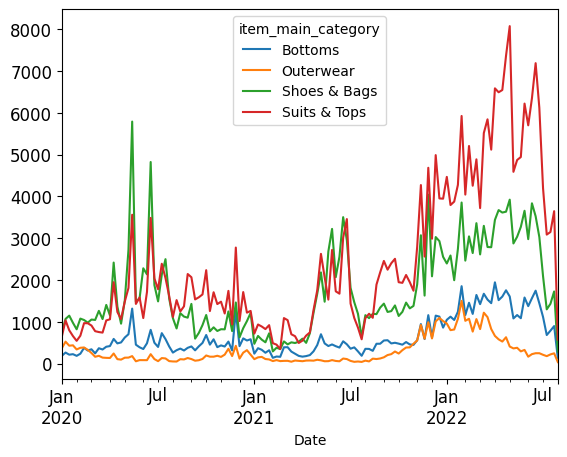

In [145]:
# Plot a chart
ax = df_weekly_unmelt.loc[:, main_lines].plot(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
#ax.legend(fontsize=15)

# Show plot
plt.show()


In [78]:
df_weekly_without_tshirtsshoes = df_weekly_sub[~df_weekly_sub["item_sub_category"].isin(["T-shirts", "Shoes"])]
print(df_weekly_without_tshirtsshoes.head())

In [90]:
Other_weekly = df_weekly_unmelt.drop(columns = ["T-shirts", "Shoes"]).sum(axis = 1)

new_df = pd.DataFrame({"T-shirts":df_weekly_unmelt.loc[:,"T-shirts"],
                       "Shoes":df_weekly_unmelt.loc[:,"Shoes"],
                       "Other": Other_weekly})
new_df.head()


,T-shirts,Shoes,Other
transaction_date,,,
2020-01-05,106,461,1888.0
2020-01-12,169,690,2573.0
2020-01-19,131,799,2150.0
2020-01-26,114,629,2034.0
2020-02-02,125,519,1687.0


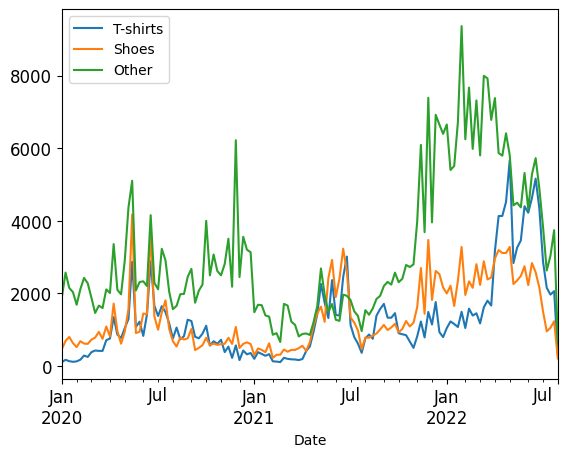

In [91]:
# Plot an area chart
ax = new_df.plot(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
#ax.legend(fontsize=15)

# Show plot
plt.show()

In [112]:
df_weekly_unmelt.head()

item_main_category,Accessories,Beachwear,Bottoms,Cosmetics & Makeup & Selfcare,Home & Decoration,Homewear & Underwear,Outerwear,Shoes & Bags,Suits & Tops
transaction_date,,,,,,,,,
2020-01-05,248,3,188,51,71,122,371,750,651
2020-01-12,276,6,267,75,34,140,527,1071,1036
2020-01-19,293,5,216,51,47,88,431,1150,799
2020-01-26,282,1,228,75,22,90,440,978,661
2020-02-02,248,7,188,49,25,103,341,823,547


In [114]:
df_weekly_sub.head()

,item_main_category,item_quantity
transaction_date,,
2020-01-05,Accessories,248
2020-01-12,Accessories,276
2020-01-19,Accessories,293
2020-01-26,Accessories,282
2020-02-02,Accessories,248


In [130]:
df.head()

,transaction_id,item_id,item_price,item_quantity,updated_at,item_id_1,item_brand,item_name,item_main_category,item_sub_category,item_gender
transaction_date,,,,,,,,,,,
2020-01-01,1005433475,568811,2.0,1,2023-11-30,568811,Prism,belt,Accessories,Belts,Men
2020-01-01,1005433475,568815,2.0,1,2023-11-30,568815,Prism,belt,Accessories,Belts,Men
2020-01-01,5429400,813253,2.0,1,2023-11-30,813253,Prism,socks,Homewear & Underwear,Socks,Men
2020-01-01,5429611,813275,2.0,1,2023-11-30,813275,Prism,socks,Homewear & Underwear,Socks,Men
2020-01-01,5434294,813275,2.0,1,2023-11-30,813275,Prism,socks,Homewear & Underwear,Socks,Men


In [132]:
df["item_main_category"].value_counts()

Suits & Tops                     316419
Shoes & Bags                     230713
Bottoms                           84876
Outerwear                         40900
Accessories                       24804
Cosmetics & Makeup & Selfcare     19144
Homewear & Underwear              17118
Home & Decoration                 11399
Beachwear                          6232
Name: item_main_category, dtype: int64

                    item_sub_category  item_quantity
transaction_date                                    
2020-01-05        Dresses & Jumpsuits             16
2020-01-12        Dresses & Jumpsuits             28
2020-01-19        Dresses & Jumpsuits             23
2020-01-26        Dresses & Jumpsuits             21
2020-02-02        Dresses & Jumpsuits             18


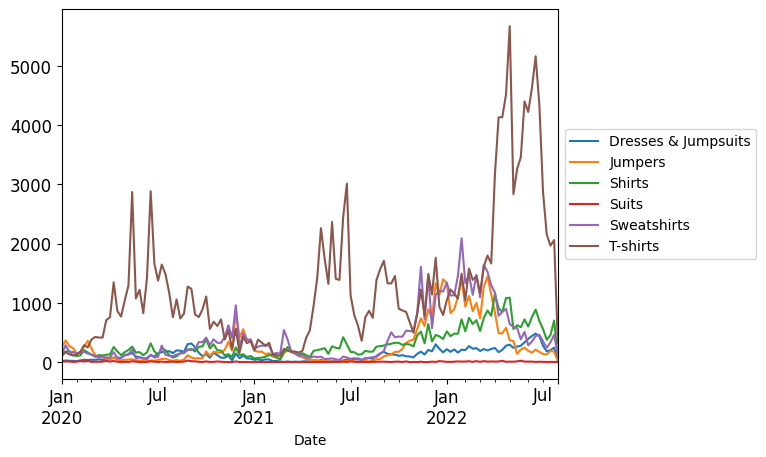

In [143]:
df_suitsandtops = df[df["item_main_category"]=="Suits & Tops"]

#print(df_suitsandtops.head())

df_weekly_sub_suitsandtops = df_suitsandtops.groupby("item_sub_category")["item_quantity"].resample("W").sum()

df_weekly_sub_suitsandtops = df_weekly_sub_suitsandtops.reset_index(level = "item_sub_category")
#print(df_weekly_sub_suitsandtops.head())
df_weekly_unmelt_suitsandtops = df_weekly_sub_suitsandtops.pivot_table(values = "item_quantity",  index = "transaction_date", columns = "item_sub_category", aggfunc="first")

# Plot an area chart
ax = df_weekly_unmelt_suitsandtops.plot(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()

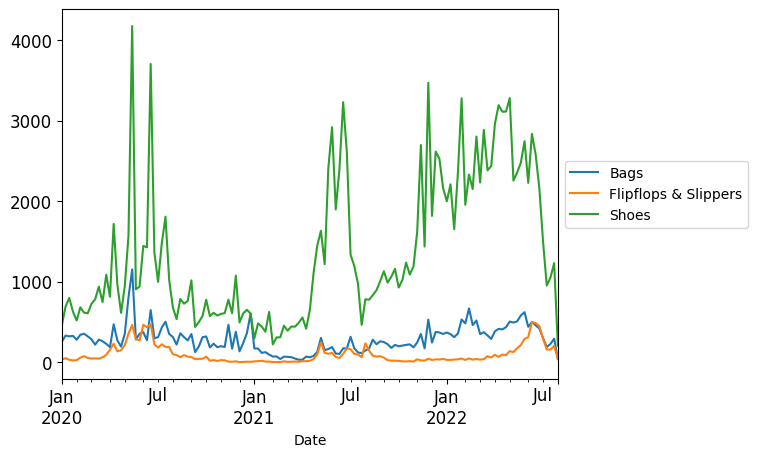

In [144]:
df_suitsandtops = df[df["item_main_category"]=="Shoes & Bags"]

#print(df_suitsandtops.head())

df_weekly_sub_suitsandtops = df_suitsandtops.groupby("item_sub_category")["item_quantity"].resample("W").sum()

df_weekly_sub_suitsandtops = df_weekly_sub_suitsandtops.reset_index(level = "item_sub_category")
#print(df_weekly_sub_suitsandtops.head())
df_weekly_unmelt_suitsandtops = df_weekly_sub_suitsandtops.pivot_table(values = "item_quantity",  index = "transaction_date", columns = "item_sub_category", aggfunc="first")

# Plot an area chart
ax = df_weekly_unmelt_suitsandtops.plot(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()